### Autoencoders

An autoencoder is a type of neural network designed to learn efficient encodings of input data in an unsupervised manner. The architecture consists of two main components: an encoder that compresses the input into a lower-dimensional latent representation (bottleneck), and a decoder that reconstructs the original input from this compressed representation.

The process begins with an input layer accepting raw data. The encoder, typically composed of several layers whose dimensions progressively decrease, transforms this input into a compact latent representation. This bottleneck layer forces the network to learn the most salient features of the data. The decoder, mirroring the encoder's architecture but in reverse, then attempts to reconstruct the original input from this compressed representation. The network is trained by minimizing the reconstruction error between the original input and the decoder's output.

Autoencoders learn through backpropagation, using the input data as both the input and the target output. During training, the network learns to preserve the most important information while discarding noise and redundancies. This dimensionality reduction capability makes autoencoders powerful tools for feature learning, data compression, noise reduction, anomaly detection, and generative modeling.

#### Pros
- **Unsupervised learning** - requires no labeled data
- **Effective dimensionality reduction** that captures complex non-linear relationships 
- **Noise filtering** capabilities through reconstruction
- **Feature extraction** that automatically identifies important patterns
- **Versatile architecture** adaptable to various data types (images, text, time series)
- **Foundation for generative models** like VAEs and adversarial autoencoders
- **Anomaly detection** through reconstruction error

#### Cons
- **Lack of interpretability** in learned latent representations
- **Non-unique representations** - different initializations can lead to different encodings
- **Limited to patterns present in training data** - poor generalization to very different data
- **Computationally intensive** for high-dimensional data
- **May learn identity function** if model capacity is too high relative to task difficulty
- **Requires careful architecture design** to avoid trivial solutions
- **No guarantee of useful feature learning** without proper constraints

#### Key Components & Concepts

##### Encoder-Decoder Configurations

The structure of encoder and decoder components affects the autoencoder's capabilities.

| Component | Typical Architectures | Parameters | Design Considerations |
|-----------|------------------------|------------|----------------------|
| Encoder | Fully-connected layers, CNNs, RNNs | Number of layers, neuron count, activation functions | Progressive reduction in layer dimensions |
| Bottleneck | Single layer (dense or conv) | Latent dimension size | Trade-off between compression and reconstruction quality |
| Decoder | Mirror of encoder (reversed) | Matching encoder architecture | Symmetry often helps training |
| Skip Connections | Optional connections between corresponding layers | Connection type (concatenation, addition) | Helps with gradient flow in deep autoencoders |

##### Autoencoder Design for Different Data Types

Autoencoders can be adapted for various types of data by modifying their architecture.

| Data Type | Encoder/Decoder Architecture | Bottleneck Design | Loss Function | Example Applications |
|-----------|------------------------------|-------------------|---------------|---------------------|
| Images | Convolutional layers | 2D/3D latent space | MSE, perceptual loss | Image compression, denoising |
| Text | RNNs, Transformers | Sequential latent state | Categorical cross-entropy | Document clustering, topic modeling |
| Time Series | 1D CNNs, LSTMs | Temporal latent codes | MSE with temporal penalty | Anomaly detection, forecasting |
| Audio | 1D CNNs, spectrogram + 2D CNNs | Multi-scale representation | Spectrogram loss, waveform loss | Audio generation, noise reduction |
| Graph Data | Graph convolutional networks | Node embeddings | Link prediction loss | Node classification, link prediction |
| Tabular Data | Fully connected layers | Low-dimensional vector | MSE, BCE with feature weighting | Anomaly detection, imputation |

#### Implementation Concepts

##### Loss Functions for Autoencoders

The choice of loss function depends on data type and application goals.

| Loss Function | Formula (Simplified) | Best For | Considerations |
|---------------|----------------------|----------|---------------|
| Mean Squared Error | MSE = mean((x - x̂)²) | Continuous data, preserving magnitude | Sensitive to outliers |
| Binary Cross-Entropy | BCE = -mean(x·log(x̂) + (1-x)·log(1-x̂)) | Binary data, image pixels in [0,1] | Works well with sigmoid activation |
| Kullback-Leibler | KL = sum(p·log(p/q)) | Enforcing latent distribution | Used as regularization term |
| Structural Similarity | SSIM-based metrics | Image quality preservation | Better aligned with human perception |
| Perceptual Loss | Feature-space distance | High-quality image reconstruction | Uses pre-trained network features |
| Adversarial Loss | From discriminator network | Realistic reconstruction | Complex training dynamics |

##### Activation Functions

Different activation functions serve different purposes in autoencoders.

| Layer | Common Activations | Rationale | Considerations |
|-------|-------------------|-----------|---------------|
| Hidden Layers | ReLU, LeakyReLU | Non-linearity, avoids vanishing gradient | Dead neurons with ReLU |
| Bottleneck | Linear, tanh, sigmoid | Depends on desired latent properties | Linear for VAEs, bounded for others |
| Output Layer | Sigmoid, tanh, linear | Should match input data range | Sigmoid for [0,1], tanh for [-1,1], linear for unbounded |

#### Tips and Tricks for Effective Autoencoders

| Tip | Why It Helps | Implementation |
|-----|--------------|----------------|
| Symmetric architecture | Better gradient flow, easier optimization | Mirror encoder layers in decoder |
| Batch normalization | Stabilizes training, especially in deep architectures | Add after activation functions |
| Tied weights | Reduces parameter count, improves regularization | Set decoder weights as transpose of encoder weights |
| Progressive training | Better optimization for complex architectures | Train shallow autoencoder first, add layers gradually |
| Warm-up period | Prevents posterior collapse in VAEs | Start with pure reconstruction loss, gradually add KL term |
| Perceptual loss | Better quality for image autoencoders | Use features from pre-trained networks for loss calculation |
| Residual connections | Helps training deeper architectures | Add skip connections between corresponding encoder-decoder layers |
| Learning rate schedule | Improves convergence | Reduce learning rate on plateau of validation loss |
| Multiple bottlenecks | Hierarchical feature learning | Create ladder-like structure with multiple latent representations |
| Multi-scale architectures | Captures features at different levels | Process and combine features from different levels of abstraction |


In [31]:
%pip install --quiet tensorflow pandas scikit-learn matplotlib

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models,Input,datasets
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
(x_train, _), (x_test, _) = datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28 * 28)  # Flatten images to 784-dimensional vectors
x_test = x_test.reshape(-1, 28 * 28)    # Flatten images to 784-dimensional vectors


In [33]:
#dense autoencoder
input_img = Input(shape=(28 * 28,))

# Define the encoder to compress the input images 
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)

# Define the decoder to reconstruct the images
decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(28 * 28, activation='sigmoid')(decoded)

autoencoder = models.Model(input_img, decoded)

In [34]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3206 - val_loss: 0.1396
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1310 - val_loss: 0.1104
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1090 - val_loss: 0.1005
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1003 - val_loss: 0.0955
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0960 - val_loss: 0.0919
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0923 - val_loss: 0.0892
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0895 - val_loss: 0.0871
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0876 - val_loss: 0.0853
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0861 - val_loss: 0.0841
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0849 - val_loss: 0.0831


In [35]:
decoded_imgsa = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [36]:
(x_train, _), (x_test, _) = datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension: (batch_size, 28, 28) → (batch_size, 28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [37]:
#convolutional autoencoder

input_img = Input(shape=(28, 28, 1))
# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [38]:
cautoencoder = models.Model(input_img, decoded)
cautoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
cautoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - loss: 0.2196 - val_loss: 0.0783
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.0776 - val_loss: 0.0740
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0741 - val_loss: 0.0720
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - loss: 0.0724 - val_loss: 0.0709
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - loss: 0.0713 - val_loss: 0.0701
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - loss: 0.0705 - val_loss: 0.0695
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.0699 - val_loss: 0.0689
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - loss: 0.0692 - val_loss: 0.0684
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0689 - val_loss: 0.0679
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0684 - val_loss: 0.0678


In [39]:
decoded_imgs = cautoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


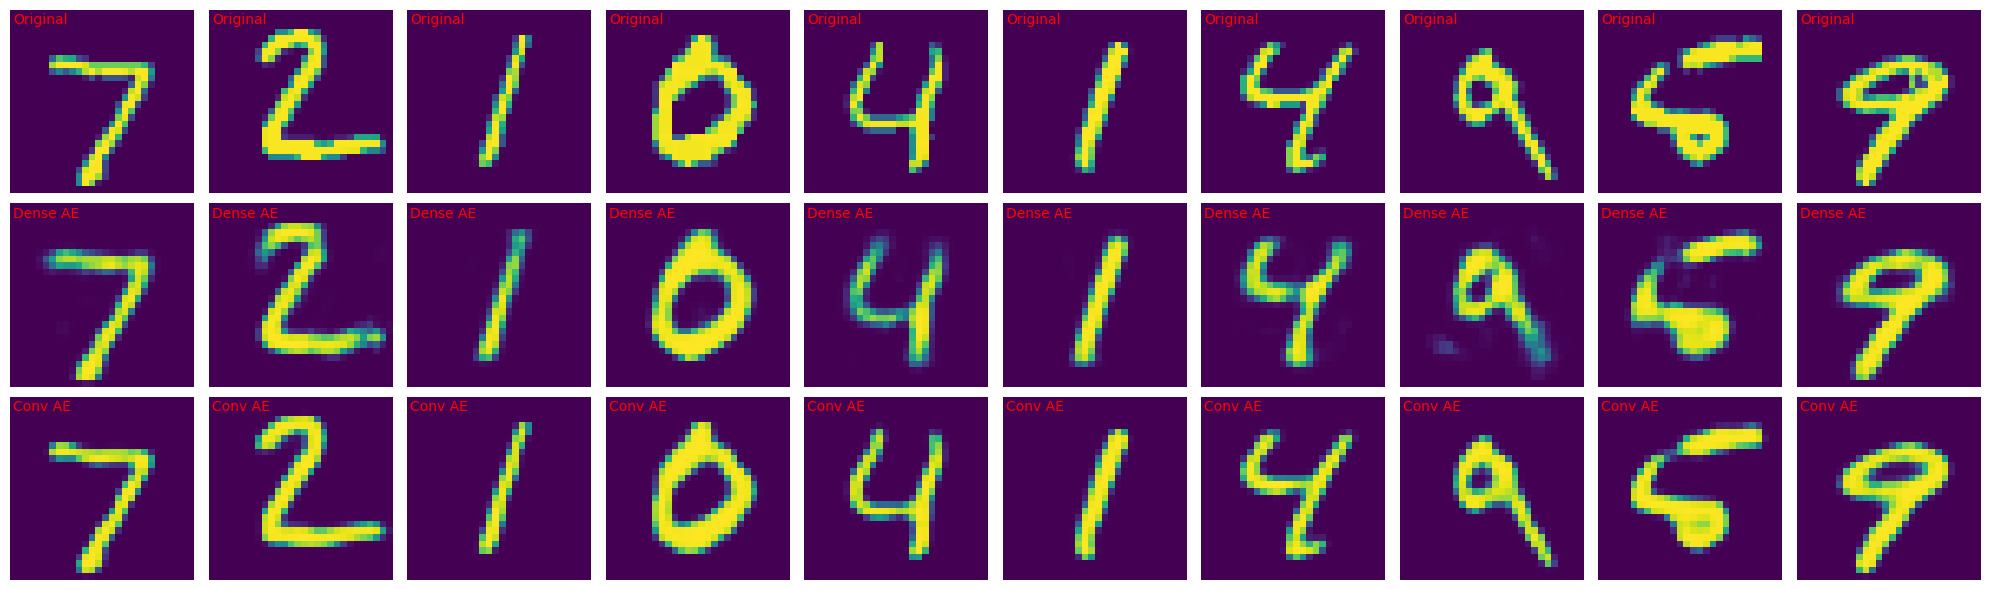

In [41]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original Image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.text(0, 0, "Original", color='red', fontsize=10, ha='left', va='top')
    plt.axis('off')

    # Reconstructed Image using Dense Autoencoder
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgsa[i].reshape(28, 28))
    plt.text(0, 0, "Dense AE", color='red', fontsize=10, ha='left', va='top')
    plt.axis('off')

    # Reconstructed Image using Convolutional Autoencoder
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.text(0, 0, "Conv AE", color='red', fontsize=10, ha='left', va='top')
    plt.axis('off')

plt.tight_layout()
plt.show()